## Plot label distribution of the dataset

### Cell 1: Setup and Configuration

This cell handles all necessary imports, configuration settings, and defines the core function.

In [5]:
# Cell 1: Setup, Imports, and Function Definition

import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_from_disk, DatasetDict
import numpy as np
import os

# --- Configuration (Adjust if your data path changes) ---
DATA_PATH = "./product_review_splits"
LABEL_COLUMN = "sentiment"

def plot_label_percentage_distribution(data_path: str, label_col: str):
    """
    Reads a DatasetDict from disk, calculates the percentage distribution of
    labels across all splits, and generates a stacked bar chart with percentages labeled.
    """
    # 1. Load the DatasetDict
    try:
        loaded_splits = load_from_disk(data_path)
        if not isinstance(loaded_splits, DatasetDict):
            print(f"Error: Directory {data_path} did not contain a DatasetDict.")
            return

        print(f"DatasetDict successfully loaded from: {data_path}")
        label_feature = loaded_splits['train'].features[label_col]
        label_names = label_feature.names
        
    except Exception as e:
        print(f"Error loading data from disk: {e}")
        print(f"Please ensure the '{data_path}' directory exists and contains the dataset.")
        return

    # 2. Aggregate Label Counts and Calculate Percentages
    counts_df = pd.DataFrame(index=label_names)
    
    for split_name, dataset in loaded_splits.items():
        label_ids = dataset[label_col]
        # Convert integer label IDs back to their string names
        label_strings = [label_feature.int2str(label_id) for label_id in label_ids]
        
        counts = pd.Series(label_strings).value_counts().reindex(label_names, fill_value=0)
        counts_df[split_name] = counts

    counts_df = counts_df.T
    counts_df['Total'] = counts_df.sum(axis=1)
    
    # Calculate proportions (normalized by row total) to get percentages
    percentage_df = counts_df.drop(columns=['Total']).div(counts_df['Total'], axis=0) * 100
    
    print("\n--- Label Percentage Distribution per Split ---")
    print(percentage_df.round(1).astype(str) + "%")


    # 3. Create the Stacked Bar Chart with Percentages Labeled
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the stacked bars
    percentage_df.plot(kind='bar', stacked=True, ax=ax, 
                       color=['salmon', 'lightskyblue', 'lightgreen'])

    plt.title('Percentage Label Distribution Across Dataset Splits', fontsize=16, weight='bold')
    plt.xlabel('Dataset Split', fontsize=14)
    plt.ylabel('Percentage of Examples in Split (%)', fontsize=14)
    plt.xticks(rotation=0)
    plt.legend(title='Sentiment Label', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    # Add text labels (percentages) inside the bars
    for i, (split_name, row) in enumerate(percentage_df.iterrows()):
        cumulative_percentage = 0
        total_count = counts_df.loc[split_name, 'Total']
        
        for label, percentage in row.items():
            if percentage >= 5: # Only label bars that are large enough (adjust as needed)
                ax.text(i, cumulative_percentage + percentage / 2, 
                        f'{percentage:.1f}%', 
                        ha='center', va='center', color='black', fontsize=9, weight='bold')
            
            cumulative_percentage += percentage
        
        # Add total count label above the bar
        ax.text(i, 100.5, f'Total: {total_count}', ha='center', va='bottom', fontsize=10)

    plt.ylim(0, 108) # Adjusted Y limit for better spacing
    plt.tight_layout()
    plt.show()

### Cell 2: Execution

This cell calls the function to execute the loading, calculation, and plotting.

DatasetDict successfully loaded from: ./product_review_splits

--- Label Percentage Distribution per Split ---
           negative neutral positive
train         36.2%   35.0%    28.7%
validation    40.0%   40.0%    20.0%
test          40.0%   30.0%    30.0%


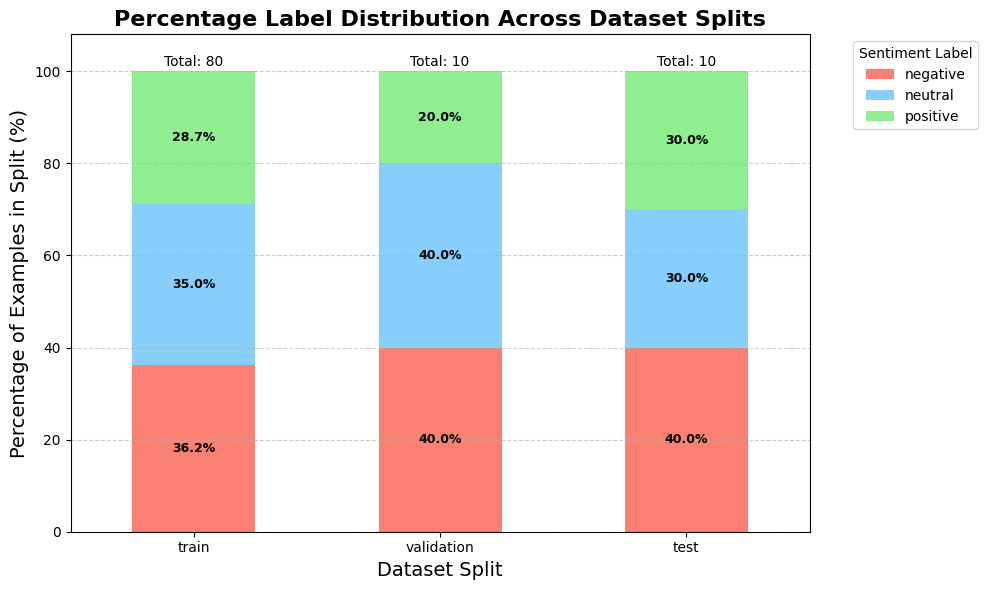

In [6]:
# Cell 2: Run the Analysis and Plot the Chart

if os.path.exists(DATA_PATH):
    plot_label_percentage_distribution(DATA_PATH, LABEL_COLUMN)
else:
    print(f"Data not found at {DATA_PATH}. Please run the previous data saving script first.")